# Monte Carlo simulation

ASSIGNMENT:
Use Monte Carlo to price an ATM binary call option.

With Geometric Brownian Motion formula to simulate the daily stock price movement over a 1 year period. 10,000 paths.

Use numpy array for the paths, to increase speed of calculation.
(It can be implemented with pandas DataFrame as well, but the calculation time is considerable higher).

Finally, Visualise the paths.

*Note:* Assuming 250 business days a year.

**GBM formula:** Spot(t+dt) = Spot * (1 + ( mu * dt ) + ( vol * sqrt(dt) * normsinv(rand()) ) )

In [1]:
# Import needed libraries

import math
from scipy.stats import norm
import numpy as np
import random
from datetime import datetime

In [11]:
# Define Market data variables and values

Spot = 100 # Spot price
mu = 0.05 # rate of growth
vol = 0.2
Term = 1
T_steps = 250
Strike= 100 # Strike price

In [6]:
# define a seed to be able to replicate the exact same paths
random.seed(24)

dt = Term / T_steps
paths = 10000

mc_paths = np.zeros([ T_steps +1 , paths])
mc_paths[0, :] = Spot

# precalculate:
# mu * dt
mu_x_dt = mu * dt
# vol * math.sqrt(dt)
vol_x_sqrt_dt = vol * math.sqrt(dt)


# get start datetime
start_time = datetime.now()

for i in range(paths):
    # dt_step = dt # delete?
    # each path to start with the current stock price
    # price_t0 = S
    price = Spot
    
    # step = 1 # delete? as T_step defines the step, no need to reiniciate it for every path
    for step in range( 1, T_steps+1 ): # CHECK!!!
        Z = random.normalvariate(0, 1)
        
        # mc_paths[step, i] = price * (1 + (mu * dt) + ( vol * math.sqrt(dt) * Z )   )
        
        mc_paths[step, i] = price * (1 + (mu_x_dt) + ( vol_x_sqrt_dt * Z )   )
        
        price = mc_paths[step, i]
        

# get start datetime
end_time = datetime.now()

# calculate simulation processing time
time = end_time-start_time

print('Processing time for', paths, ':', time)

Processing time for 10000 : 0:00:03.424975


In [7]:
# Use last price (simulated after 1 year) to get the payoff.
# Then calculate the payoffs average

last_price = np.array(mc_paths[-1, :])

mc_price = np.mean(last_price)

print('Price with MC simulation is', round(mc_price, 6) )

Price with MC simulation is 105.179616


In [8]:
sum( last_price > Strike ) / paths
# compare with Black-Scholes

0.5611

# Visulize paths

In [9]:
# plot paths with matplotlib

%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True) 

<IPython.core.display.Javascript object>


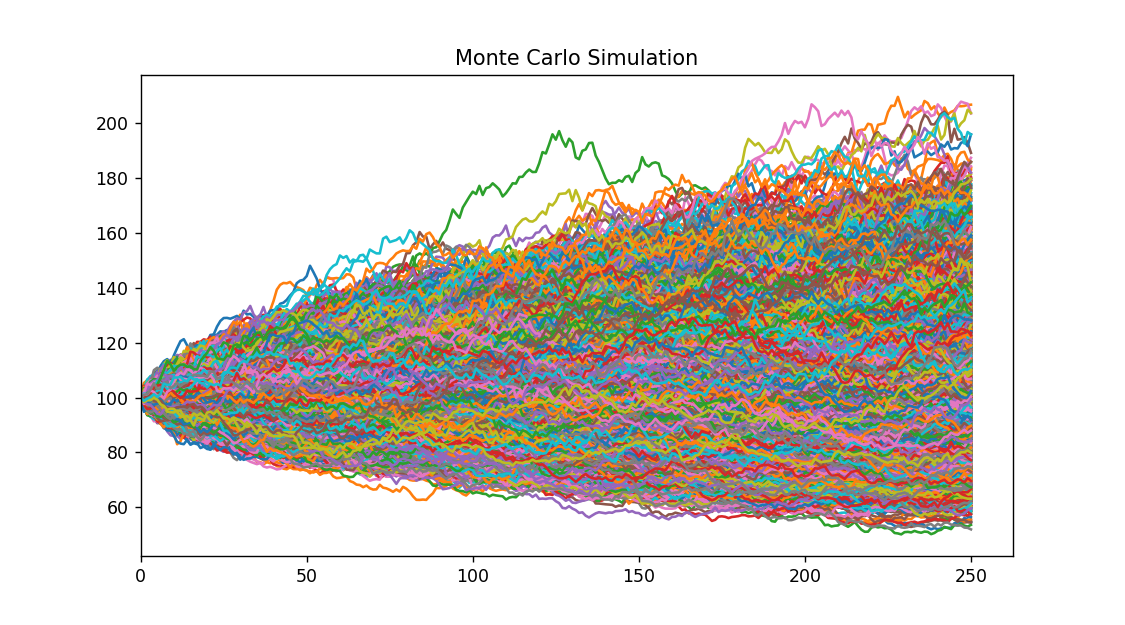

(0.0, 262.5)

In [10]:
# Plot MC paths

fig1 = plt.figure(figsize = [9, 5] )
plt.title('Monte Carlo Simulation')
plt.plot(mc_paths[:, :])
plt.xlim(xmin=0)